## Project Name: Problem-3_Model 1 Finding Factors and Sales forecast for 6 periods
We are finding the feature importance for sales 'EQ' with help of varoius graphs
We are doing prediction by Rolling average and Linear Regression

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

C:\Users\Shriti Datta\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#'xlrd' package is not compatable with my, hencence converting testdata and traindata '.xlsx' files to '.csv' files and loading

In [2]:
df1=pd.read_csv(r'TrainingData.csv')
df_testdata = pd.read_csv(r'TestData.csv')
## print shape of dataset with rows and columns
print(df1.shape,df_testdata.shape)

(999, 39) (5, 39)


In [3]:
# Merging Testing and Training Data
frames = [df1, df_testdata]
df_proddata = pd.concat(frames,ignore_index=True, sort=False, axis = 0)

# ** Data Analysis

In [4]:
## Here we will check the percentage of nan values present in each feature
## 1 -step making the list of features which have missing values

features_with_na=[features for features in df_proddata.columns if df_proddata[features].isnull().sum()>1]

## 2- step printing the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df_proddata[feature].isnull().mean(), 3),  ' % missing values')

Period 0.961  % missing values
EQ 0.961  % missing values
Social_Search_Impressions 0.971  % missing values
Social_Search_Working_cost 0.971  % missing values
Digital_Impressions 0.974  % missing values
Digital_Working_cost 0.975  % missing values
Print_Impressions.Ads40 0.962  % missing values
Print_Working_Cost.Ads50 0.962  % missing values
OOH_Impressions 0.988  % missing values
OOH_Working_Cost 0.991  % missing values
SOS_pct 0.961  % missing values
Digital_Impressions_pct 0.987  % missing values
CCFOT 0.961  % missing values
Median_Temp 0.961  % missing values
Median_Rainfall 0.961  % missing values
Fuel_Price 0.961  % missing values
Inflation 0.961  % missing values
Trade_Invest 0.961  % missing values
Brand_Equity 0.961  % missing values
Avg_EQ_Price 0.961  % missing values
Any_Promo_pct_ACV 0.961  % missing values
Any_Feat_pct_ACV 0.988  % missing values
Any_Disp_pct_ACV 0.975  % missing values
EQ_Base_Price 0.961  % missing values
Est_ACV_Selling 0.961  % missing values
pct_AC

### Since they are many missing values, we need to find the relationship between missing values and EQ

Plotting diagram for this relationship


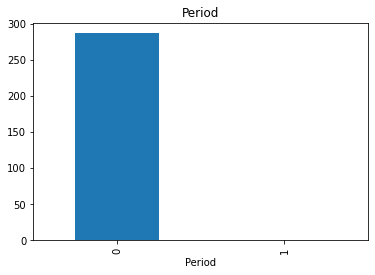

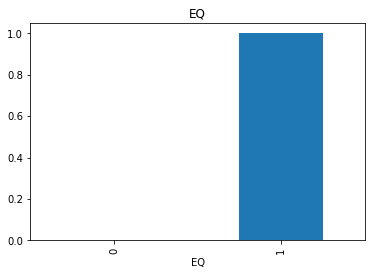

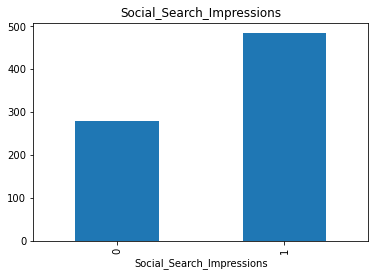

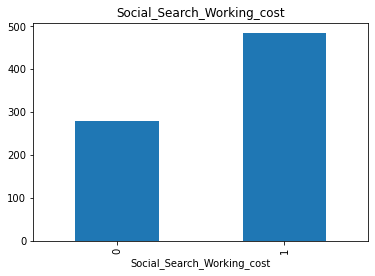

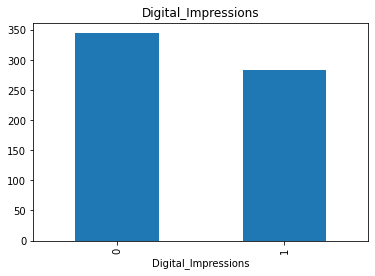

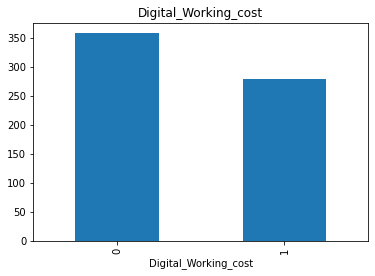

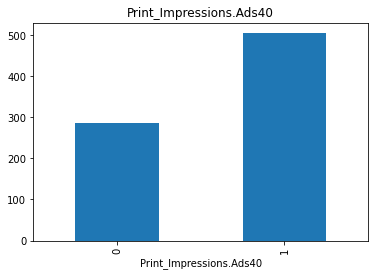

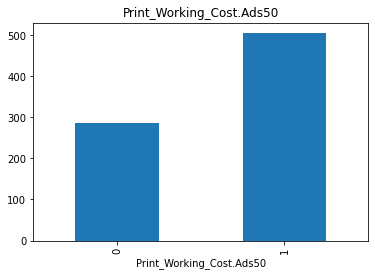

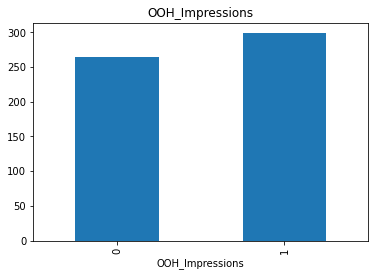

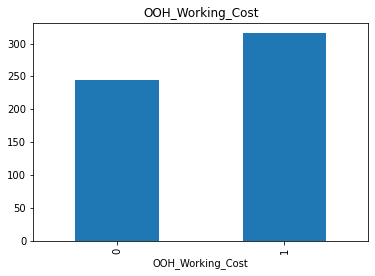

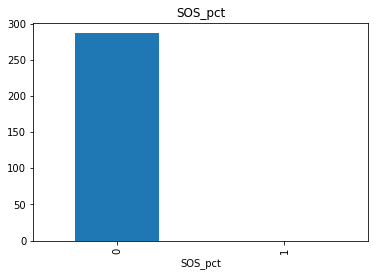

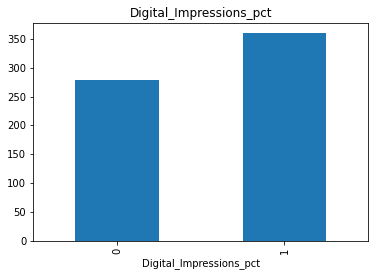

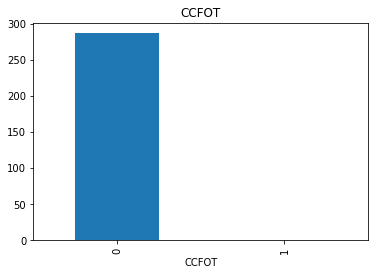

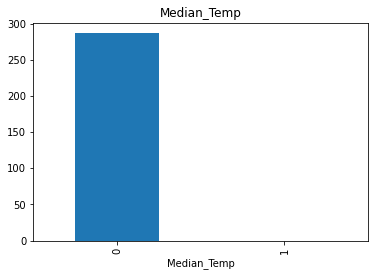

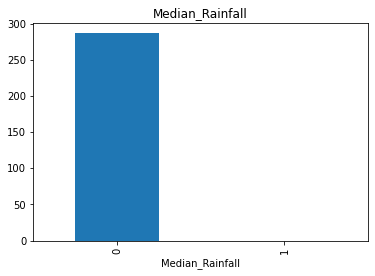

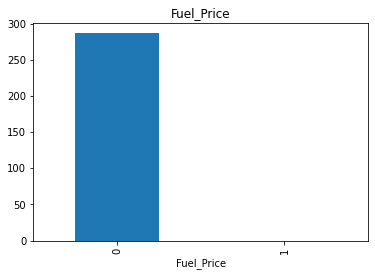

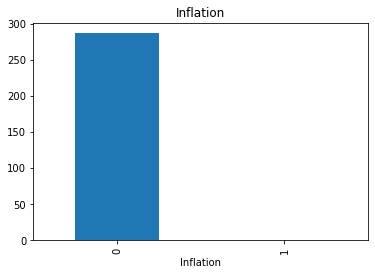

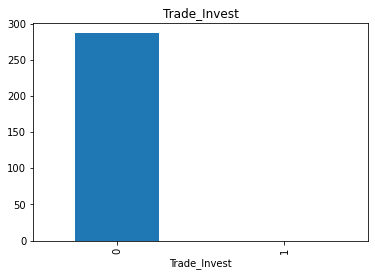

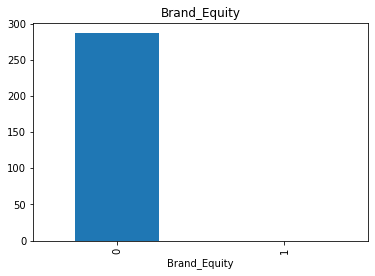

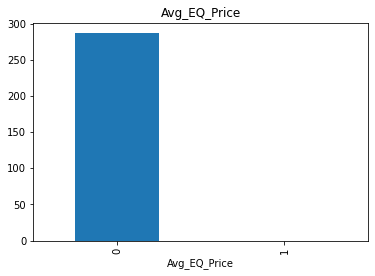

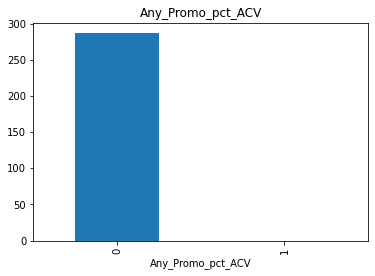

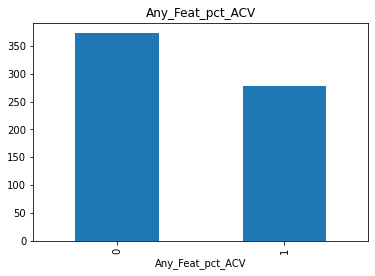

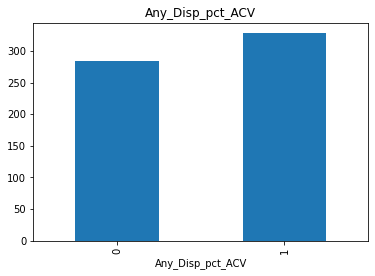

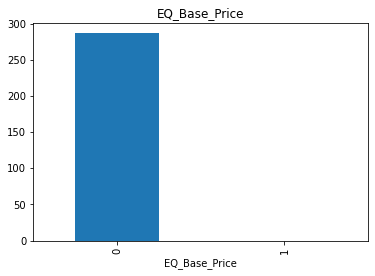

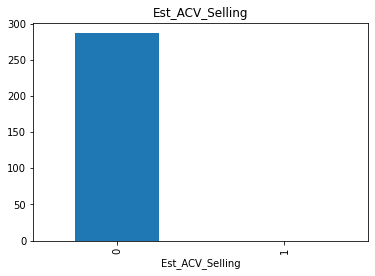

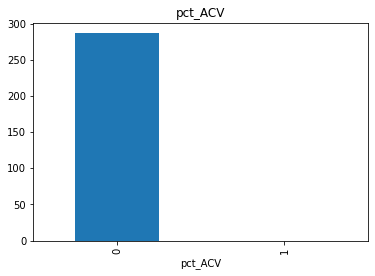

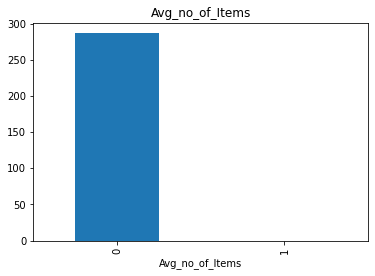

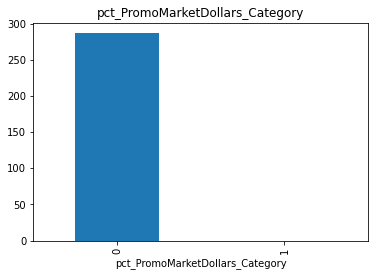

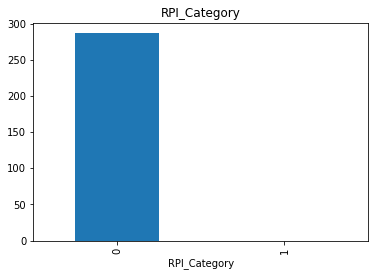

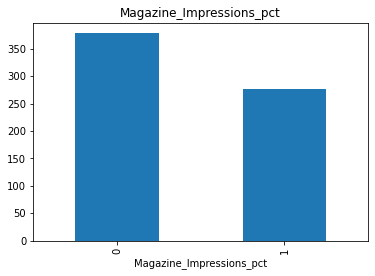

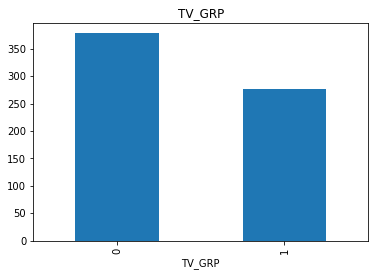

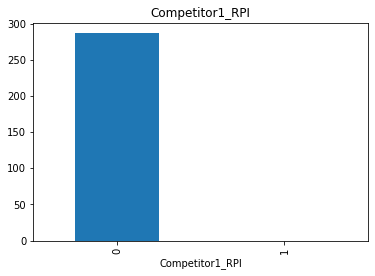

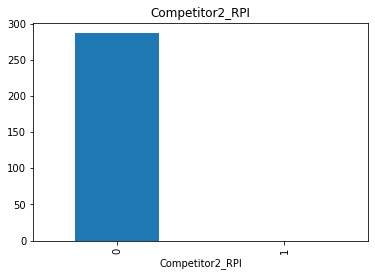

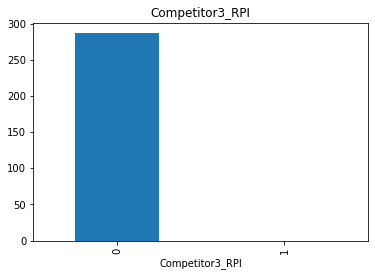

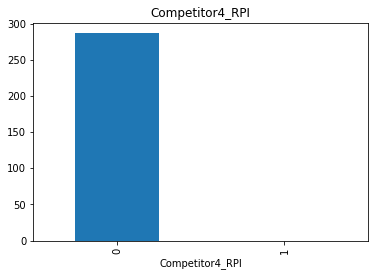

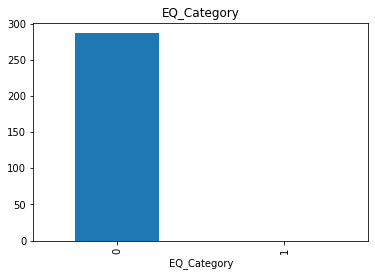

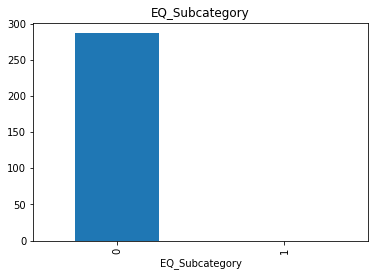

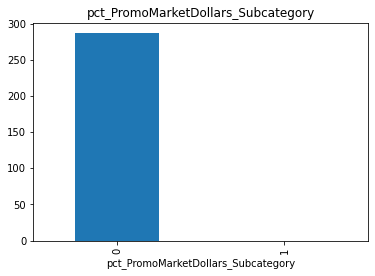

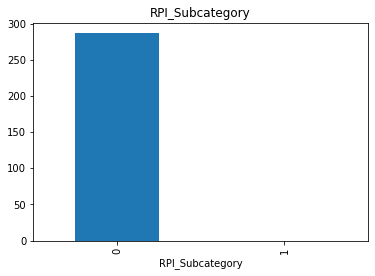

In [5]:
for feature in features_with_na:
    data = df_proddata.copy()
    
    # Making a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['EQ'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Plotting maps for Co-rellation Coefficient

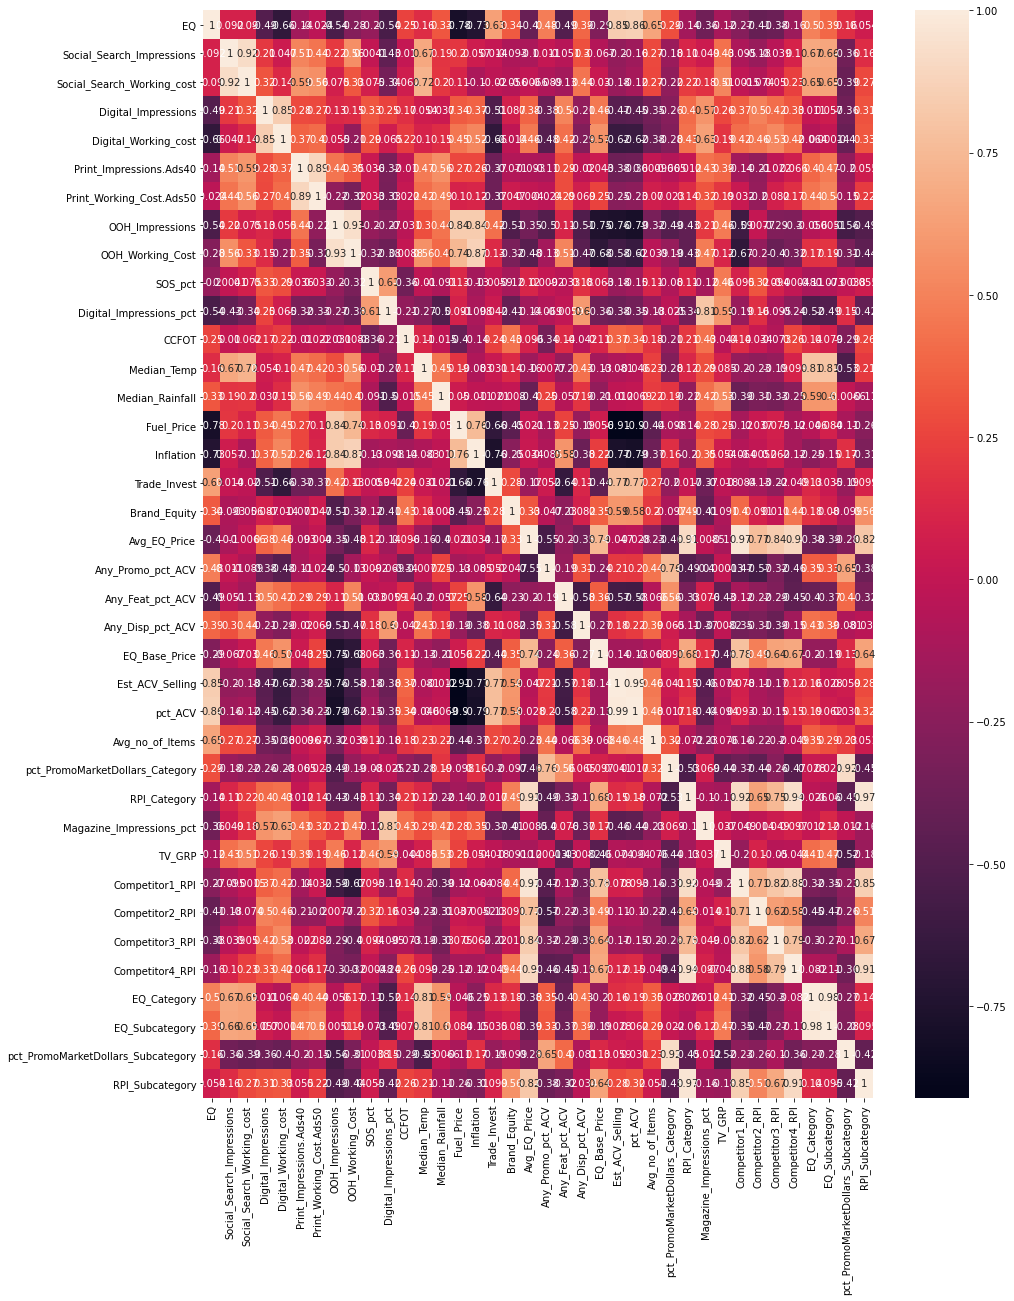

In [6]:
# ** HeatMap
plt.figure(figsize=(15, 20))
sns.heatmap(df_proddata.corr(), annot=True)

In [7]:
## 1. What are the major drivers for sales(EQ)?
## Taking factors that have co-rellation >0.6 or <-0.6 for 'EQ'
cor = df_proddata.corr()
cor[(cor > 0.60) | (cor < -0.60)]

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
EQ,1.000000,NaN,NaN,NaN,-0.661672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.783871,-0.728427,0.630037,NaN,NaN,NaN,NaN,NaN,NaN,0.848051,0.859410,0.649797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social_Search_Impressions,NaN,1.000000,0.924215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.665181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667020,0.663691,NaN,NaN
Social_Search_Working_cost,NaN,0.924215,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.649066,0.647432,NaN,NaN
Digital_Impressions,NaN,NaN,NaN,1.000000,0.847296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Digital_Working_cost,-0.661672,NaN,NaN,0.847296,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.658558,NaN,NaN,NaN,NaN,NaN,NaN,-0.622698,-0.619497,NaN,NaN,NaN,0.628430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Print_Impressions.Ads40,NaN,NaN,NaN,NaN,NaN,1.000000,0.891685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Print_Working_Cost.Ads50,NaN,NaN,NaN,NaN,NaN,0.891685,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OOH_Impressions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.933454,NaN,NaN,NaN,NaN,NaN,0.837321,0.837893,NaN,NaN,NaN,NaN,NaN,NaN,-0.751730,-0.762274,-0.787642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OOH_Working_Cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933454,1.000000,NaN,NaN,NaN,NaN,NaN,0.743951,0.866087,NaN,NaN,NaN,NaN,NaN,NaN,-0.679973,NaN,-0.621282,NaN,NaN,NaN,NaN,NaN,-0.671189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOS_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.614653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ** Filling Missing values

In [8]:
periods=df_proddata.Period.str.split('-').apply(pd.Series)
periods.columns=['Year','PeriodNo']
periods.PeriodNo=periods.PeriodNo.str.replace('Period:','')
df_proddata=pd.concat([periods,df_proddata],axis=1)
df_proddata.drop(['Period'],axis=1,inplace=True)

For columns which are having more than 50% of records as null, and not having direct impact on the dependent feature 'EQ'.

In [9]:
df_proddata.drop(['OOH_Impressions','OOH_Working_Cost','Digital_Impressions_pct','Any_Feat_pct_ACV','Magazine_Impressions_pct','TV_GRP'],axis=1,inplace=True)

In [10]:
# PeriodNo,Year contained NaN
df_proddata = df_proddata[~df_proddata['PeriodNo'].isnull()]
df_proddata = df_proddata[~df_proddata['Year'].isnull()]

Filling the missing values with mean for the respective columns

In [11]:
df_proddata.Social_Search_Impressions=df_proddata.Social_Search_Impressions.fillna(df_proddata.Social_Search_Impressions.mean())
df_proddata.Social_Search_Working_cost=df_proddata.Social_Search_Working_cost.fillna(df_proddata.Social_Search_Working_cost.mean())
df_proddata.Digital_Impressions=df_proddata.Digital_Impressions.fillna(df_proddata.Digital_Impressions.mean())
df_proddata.Digital_Working_cost=df_proddata.Digital_Working_cost.fillna(df_proddata.Digital_Working_cost.mean())
df_proddata.Any_Disp_pct_ACV=df_proddata.Any_Disp_pct_ACV.fillna(df_proddata.Any_Disp_pct_ACV.mean())
df_proddata['Print_Impressions.Ads40']=df_proddata['Print_Impressions.Ads40'].fillna(df_proddata['Print_Impressions.Ads40'].mean())
df_proddata['Print_Working_Cost.Ads50']=df_proddata['Print_Working_Cost.Ads50'].fillna(df_proddata['Print_Working_Cost.Ads50'].mean())
df_proddata.PeriodNo=df_proddata.PeriodNo.apply(int)
df_proddata.Year=df_proddata.Year.apply(int)
df_proddata_pred=df_proddata[['Year','PeriodNo','EQ']]


In [12]:
from sklearn.metrics import mean_squared_error
for no in range(2,20):
    df_proddata_pred['EQ_Pred']=df_proddata.sort_values(['Year','PeriodNo']).EQ.rolling(no).mean()
    err_EQ=np.sqrt(mean_squared_error(df_proddata.EQ.loc[no-1:],df_proddata_pred.EQ_Pred.dropna()))
    print(no,err_EQ)

2 27.265193340508485
3 41.45757242642234
4 50.18199691414444
5 57.771325786365324
6 64.10238175517024
7 68.2754247585715
8 72.54125782362536
9 76.48889862912438
10 80.37001439634591
11 80.81474802389425
12 77.80213846642835
13 73.7323344773812
14 66.00307027432434
15 84.10400113214526
16 85.80997799355501
17 91.41051815424333
18 97.07779863399689
19 102.32390252957813


C:\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [13]:
df_proddata2=pd.concat([df_proddata,pd.get_dummies(df_proddata.PeriodNo,prefix='PN')],axis=1)

In [15]:
y=df_proddata2['EQ'].values
X=df_proddata2.drop(['EQ','Year'],axis=1).values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_std,y,test_size=0.20,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

linreg =sm.OLS(ytrain, xtrain).fit()

pred_train=linreg.predict(xtrain)
pred_test=linreg.predict(xtest)
from sklearn.metrics import mean_squared_error
lin_rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
lin_rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))
print("Train Error",lin_rmse_train,"Test Error",lin_rmse_test)

Train Error 1.7869913988107997e-12 Test Error 2168.5996858636104


In [17]:
linreg.summary()

C:\Users\Shriti Datta\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Shriti Datta\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\Shriti Datta\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\Shriti Datta\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                nan
Time:                        23:46:51   Log-Likelihood:                 794.58
No. Observations:                  31   AIC:                            -1527.
Df Residuals:                       0   BIC:                            -1483.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -160.5769        inf         -0        nan         nan         nan
x2         -1187.0150        inf         -0        nan         nan         nan
x3           555.7803        inf          0        nan         nan         nan
x4          -132.8602        inf         -0        nan         nan         nan
x5           235.9038        inf          0        nan         nan         nan
x6            81.5905        inf          0        nan         nan         nan
x7           100.6578        inf          0        nan         nan         nan
x8          -258.0300        inf         -0        nan         nan         nan
x9           277.0589        inf          0        nan         nan         nan
x10           34.2784        inf          0        nan         nan         nan
x11         -192.3978        inf         -0        nan         nan         nan
x12         -187.8839        inf         -0        nan         nan         nan
x13         -178.3346        inf         -0        nan         nan         nan
x14          -17.0761        inf         -0        nan         nan         nan
x15         -584.6867        inf         -0        nan         nan         nan
x16          694.8263        inf          0        nan         nan         nan
x17          809.9957        inf          0        nan         nan         nan
x18           72.5429        inf          0        nan         nan         nan
x19          -70.9185        inf         -0        nan         nan         nan
x20          -41.4443        inf         -0        nan         nan         nan
x21          118.0515        inf          0        nan         nan         nan
x22         -404.7466        inf         -0        nan         nan         nan
x23          269.3856        inf          0        nan         nan         nan
x24          253.3050        inf          0        nan         nan         nan
x25          315.3985        inf          0        nan         nan         nan
x26          535.6091        inf          0        nan         nan         nan
x27         -672.3692        inf         -0        nan         nan         nan
x28         -388.4088        inf         -0        nan         nan         nan
x29         -138.5229        inf         -0        nan         nan         nan
x30          328.4311        inf          0        nan         nan         nan
x31         -570.3217        inf         -0        nan         nan         nan
x32          106.1111        inf          0        nan         nan         nan
x33          122.6246        inf          0        nan         nan         nan
x34          107.6620        inf          0        nan         nan         nan
x35         -187.5085        inf         -0        nan         nan         nan
x36          -25.1839        inf         -0        nan         nan         nan
x3